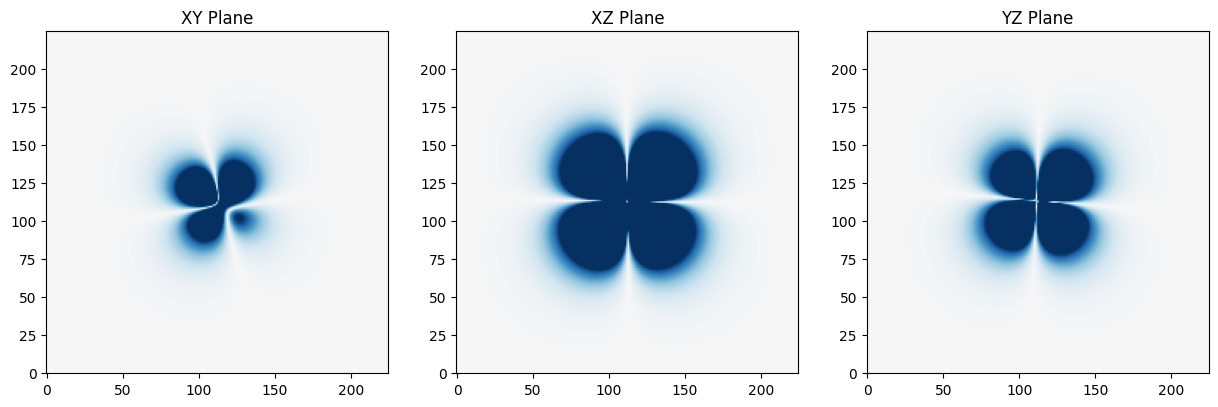

'\n# Create figure with subplots\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))\n\n# Raw data (dotty)\nax1.imshow(data[nz//2], cmap="RdBu", origin="lower")\nax1.set_title("Raw Grid Data")\n\n# Smoothed visualization\nim = ax2.imshow(smoothed[nz//2], cmap="RdBu", origin="lower")\nax2.set_title("Smoothed Visualization")\n\n# Add common colorbar\nfig.colorbar(im, ax=[ax1, ax2], shrink=0.6)\nplt.savefig("comparison.png", dpi=300, bbox_inches=\'tight\')\n'

In [4]:
# worked like magic there..
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Read and reshape data (your existing code)
with open("c_ii_band9_test_k1_b9_sppol2") as f:
    lines = f.readlines()
nx, ny, nz = map(int, [lines[3].split()[0], lines[4].split()[0], lines[5].split()[0]])
data = np.array([float(val) for line in lines[7:] for val in line.split()]).reshape(nz, ny, nx)
# Apply mild Gaussian smoothing ONLY for visualization
smoothed = gaussian_filter(data, sigma=0.7)  # Adjust sigma as needed (0.5-1.0)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
slices = [
    data[nz//2, :, :],  # XY slice
    data[:, ny//2, :],   # XZ slice
    data[:, :, nx//2]    # YZ slice
]
titles = ["XY Plane", "XZ Plane", "YZ Plane"]

for ax, slice, title in zip(axes, slices, titles):
    ax.imshow(slice, cmap="RdBu", origin="lower", vmin=-1, vmax=1)  # Adjust vmin/vmax as needed
    ax.set_title(title)
plt.show()
'''
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Raw data (dotty)
ax1.imshow(data[nz//2], cmap="RdBu", origin="lower")
ax1.set_title("Raw Grid Data")

# Smoothed visualization
im = ax2.imshow(smoothed[nz//2], cmap="RdBu", origin="lower")
ax2.set_title("Smoothed Visualization")

# Add common colorbar
fig.colorbar(im, ax=[ax1, ax2], shrink=0.6)
plt.savefig("comparison.png", dpi=300, bbox_inches='tight')
'''